# House Price Prediction

https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

1. Understand the problem: look at each variable and do a philosophical analysis about their meaning and importance
2. Univariable study: Focus on the dependent variabl (SalePrice) and try to know a little bit more about it
3. Multi-variate study: Understand how the dependent variable and independent variables relate
4. Basic cleaning: Clean the dataset and handle the missing data, outliers and categorical variable 
5. Test assumption: Check if the data meets the assumptions required by most multivariable techniques

## Import data

In [1]:
cd "/Users/lli2/Git/kaggle/House_Price"

/Users/lli2/Git/kaggle/House_Price


In [23]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="ticks")

import numpy as np
from scipy.stats import norm 
from sklearn.preprocessing import StandardScaler
from scipy import stats
import xlsxwriter
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df_train = pd.read_csv("train.csv")
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [15]:
# df_train.dtypes.to_csv("df_train_columns.csv", index=True)

## Column Information Spreadsheet

* Variable - Variable name 
* Type - Identification of the variables' type
* Segment - Identification of the variables' segment: building, space or location
* Expectation - Expected about the variable influence
* Conclusion - Conclusion about the importance of the variable
* Comments - note

##### Ask myself:
* Do we think about this variable when we are buying a house? (e.g. When we think about the house of our dreams, do we care about its 'Masonry veneer type'?).
* If so, how important would this variable be? (e.g. What is the impact of having 'Excellent' material on the exterior instead of 'Poor'? And of having 'Excellent' instead of 'Good'?).
* Is this information already described in any other variable? (e.g. If 'LandContour' gives the flatness of the property, do we really need to know the 'LandSlope'?).

###### Probably important:
* OverallQual (which is a variable that I don't like because I don't know how it was computed; a funny exercise would be to predict 'OverallQual' using all the other variables available).
* YearBuilt
* TotalBsmtSF
* GrLivArea

## Dependent Variable: SalePrice

In [16]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

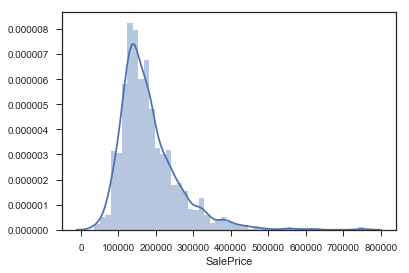

In [39]:
# historic
sns.distplot(df_train['SalePrice'])

* Deviate from normal distribution
* Have right skewness
* Show peakedness

In [18]:
# skewness and kurtosis
print("Skewness: %f" %df_train['SalePrice'].skew())
print("Kurtosis: %f" %df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


## SalePrice with Important Variables

#### GrLivArea
Above grade (ground) living area square feet

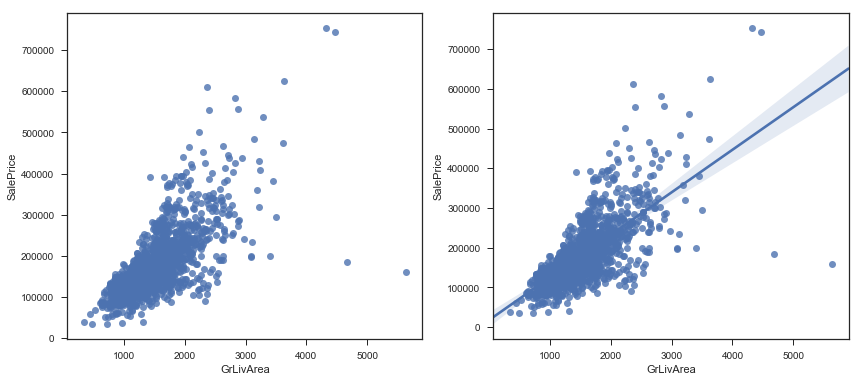

In [37]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
sns.regplot(x='GrLivArea', y='SalePrice', data=df_train, fit_reg=False)
plt.subplot(122)
sns.regplot(x='GrLivArea', y='SalePrice', data=df_train)

#### TotalBsmtSF
Total square feet of basement area

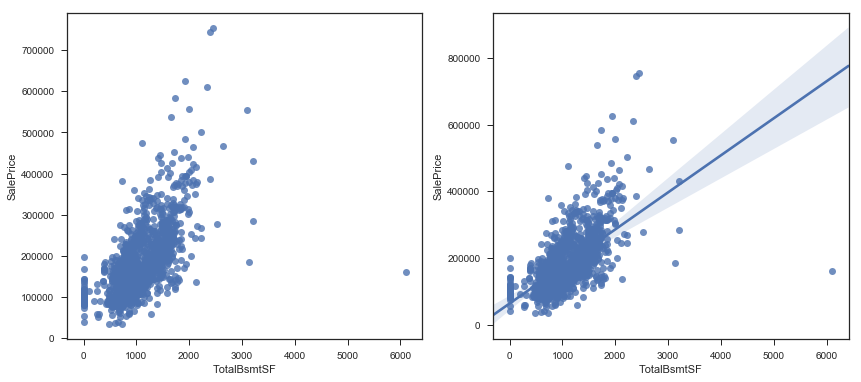

In [38]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
sns.regplot(x='TotalBsmtSF', y='SalePrice', data=df_train, fit_reg=False)
plt.subplot(122)
sns.regplot(x='TotalBsmtSF', y='SalePrice', data=df_train)

#### OverallQual
Rates the overall material and finish of the house